# Linear Regression

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
X = 2 * np.random.rand(100, 1)

y = 4 + 3 * X + np.random.randn(100, 1) 

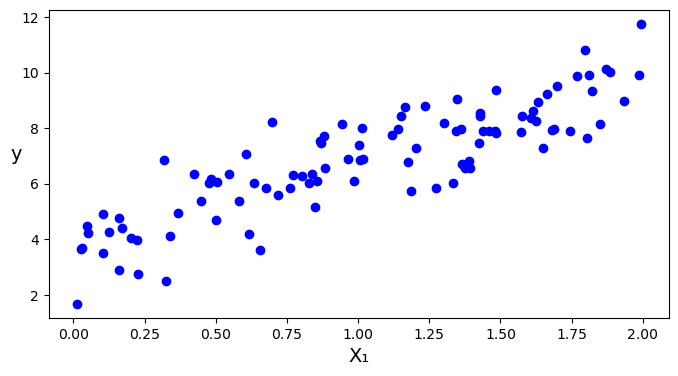

In [6]:
plt.figure(figsize=(8,4))
plt.xlabel('X₁', fontsize=14)
plt.ylabel('y', fontsize=14, rotation='horizontal')

plt.plot(X, y, 'bo')
plt.show()

## Using the normal equation

In [7]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

## We use the function y = 3x + 4 + gaussian noise. The equation finds:

In [8]:
theta_best

array([[3.76845869],
       [3.01268894]])

### we expected $\theta_ 0$ = 4 and $\theta_ 1$ = 3 It came close, but the Gaussian noise made it impossible to recover the exact parameters of the original function

## Now we go do some predicitions with the normal equation

In [9]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]

In [10]:
y_predict = X_new_b.dot(theta_best)

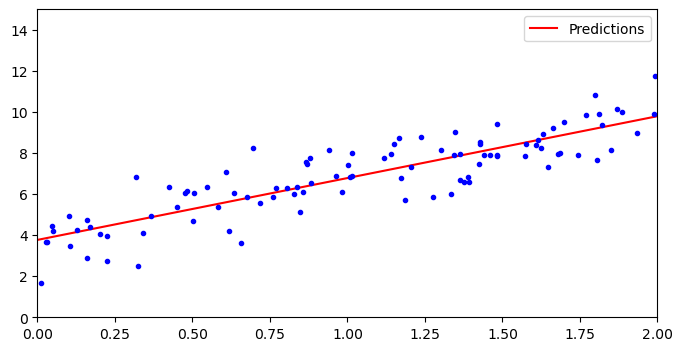

In [11]:
plt.figure(figsize=(8, 4))

plt.plot(X_new, y_predict, 'r-', label='Predictions')
plt.plot(X, y, "b.")

plt.axis([0, 2, 0, 15])

plt.legend()
plt.show()

## linear regression with Scikit-Learn

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lin_reg = LinearRegression()

lin_reg.fit(X, y)

lin_reg.intercept_, lin_reg.coef_

(array([3.76845869]), array([[3.01268894]]))

In [14]:
lin_reg.predict(X_new)

array([[3.76845869],
       [9.79383656]])

## LinearRegression is based in the function scipy.linalg.lstsq() Least squares you can call it directly

In [15]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

In [16]:
theta_best_svd

array([[3.76845869],
       [3.01268894]])

## You can use np.linalg.pinv() to calculate the [pseudoinverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse) directly

In [17]:
np.linalg.pinv(X_b).dot(y)

array([[3.76845869],
       [3.01268894]])

## Gradient Descent (batch)

In [21]:
eta = 0.1  # learning rate
n_epochs = 1000
m = len(X_b)  # number of instances

np.random.seed(42)
theta = np.random.randn(2, 1)  # randomly initialized model parameters

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [22]:
theta

array([[3.76845869],
       [3.01268894]])

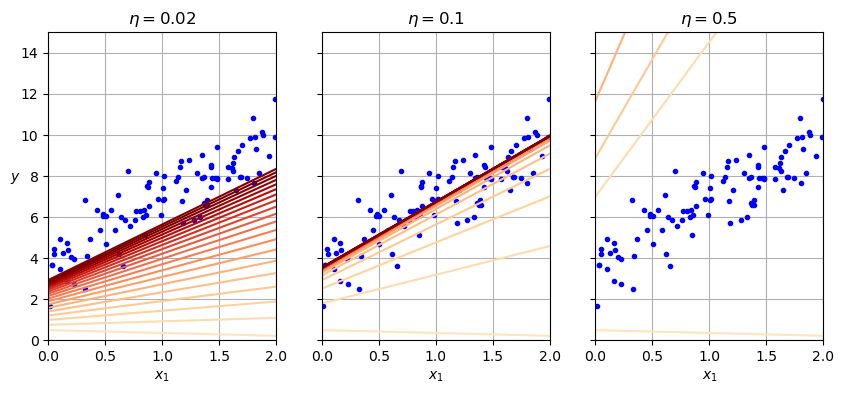

In [23]:
# extra code – generates and saves Figure 4–8

import matplotlib as mpl

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)
plt.show()

## Stochastic Gradient Descent

In [24]:
n_epochs = 50

t0, t1 = 5, 50 # learning schedule hyperparameters


def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)

In [25]:
for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients

In [26]:
theta

array([[3.76050323],
       [3.01978218]])

In [33]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expects 1D target

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [34]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.76849235]), array([3.01437986]))